In [2]:
from lib.utils import *
from lib.models import *
from lib.ekyn import *
from lib.env import *

In [3]:
X,y = load_psd_label_pairs_windowed(get_ekyn_ids())
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,shuffle=True,random_state=0)
X_train,X_dev,y_train,y_dev = train_test_split(X_train,y_train,test_size=.25,shuffle=True,random_state=0)
trainloader = DataLoader(TensorDataset(X_train,y_train),batch_size=32,shuffle=True)
devloader = DataLoader(TensorDataset(X_dev,y_dev),batch_size=32,shuffle=True)
testloader = DataLoader(TensorDataset(X_test,y_test),batch_size=32,shuffle=True)

In [7]:
criterion = torch.nn.CrossEntropyLoss()

model = RecreatedMLP(input_size=210)
model.load_state_dict(torch.load(f=f'0_mlp_ss/best_model.pt'))
model.to(DEVICE)

RecreatedMLP(
  (d1): Dropout1d(p=0.1, inplace=False)
  (fc1): Linear(in_features=210, out_features=500, bias=True)
  (d2): Dropout1d(p=0.2, inplace=False)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (d3): Dropout1d(p=0.2, inplace=False)
  (fc3): Linear(in_features=500, out_features=500, bias=True)
  (d4): Dropout1d(p=0.3, inplace=False)
  (fc4): Linear(in_features=500, out_features=3, bias=True)
)

{'precision': 0.8873492226956863, 'recall': 0.8720182852763689, 'f1': 0.8793922585754679}
0.2240322386690726


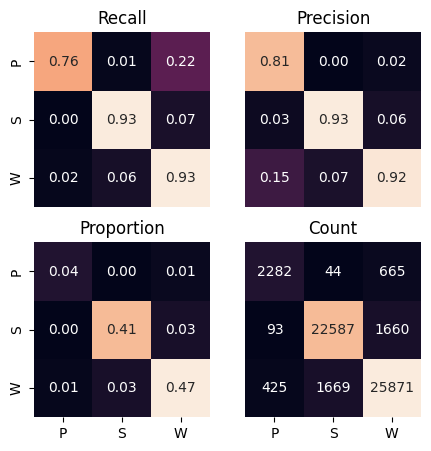

In [13]:
loss,metrics,y_true,y_pred,_ = evaluate(devloader,model,criterion,DEVICE)
cm_grid(y_true=y_true,y_pred=y_pred)
print(metrics)
print(loss)

{'precision': 0.8845486198894622, 'recall': 0.8720108648144659, 'f1': 0.8780854030956095}
0.22029982882829952


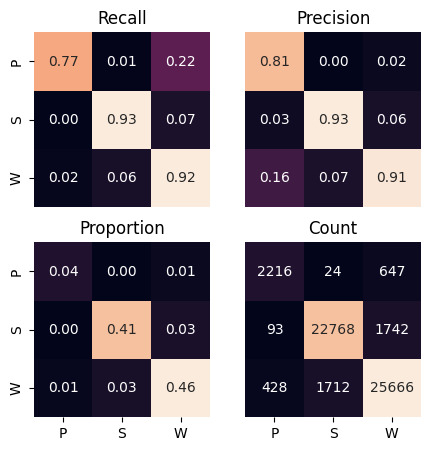

In [14]:
loss,metrics,y_true,y_pred,_ = evaluate(testloader,model,criterion,DEVICE)
cm_grid(y_true=y_true,y_pred=y_pred)
print(metrics)
print(loss)